#                                      PHILLIES ANALYTICS CHALLENGE

<h1> Importing Libraries </h1>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.grid_search import GridSearchCV
from sklearn import ensemble

C:\Users\Prateikm\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Prateikm\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Prateikm\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<h1>Descriptive Analytics</h1>

<h3> Importing data set </h3>

In [2]:
data = pd.read_csv('strikeouts.csv')

<h3> Viewing the first 5 rows </h3>

In [3]:
data.head()

,Name,Team,fangraphs_id,G,IP,ERA,FIP,xFIP,AVG,K%,BB%,Swing%,Contact%,GB%,LD%,FB%,2ndHalfK%,2ndHalfIP
0,Clayton Kershaw,Dodgers,2036,19,132.1,2.18,3.02,2.76,0.194,0.314,0.044,0.508,0.731,0.453,0.197,0.350,0.249,42.2
1,Max Scherzer,Nationals,3137,18,128.1,2.10,2.62,3.08,0.162,0.355,0.055,0.519,0.692,0.387,0.146,0.467,0.324,72.1
2,Chris Sale,Red Sox,10603,18,127.2,2.75,2.10,2.67,0.198,0.359,0.044,0.513,0.684,0.363,0.218,0.419,0.366,86.2
3,Chris Archer,Rays,6345,19,123.0,3.95,3.17,3.44,0.245,0.285,0.074,0.469,0.719,0.422,0.224,0.354,0.303,78.0
4,Ivan Nova,Pirates,1994,18,120.2,3.21,4.14,4.17,0.252,0.139,0.031,0.495,0.849,0.479,0.228,0.293,0.212,66.1


<h3> Data has 296 rows and 18 columns </h3>

In [4]:
data.shape

(296, 18)

In [5]:
data.describe()

,fangraphs_id,G,IP,ERA,FIP,xFIP,AVG,K%,BB%,Swing%,Contact%,GB%,LD%,FB%,2ndHalfK%,2ndHalfIP
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,9189.635135,24.429054,60.499662,3.946791,4.099831,4.180203,0.239108,0.229264,0.083554,0.467956,0.768922,0.448557,0.198003,0.353463,0.225490,45.620946
std,4537.266935,11.280779,29.000082,1.378712,1.116321,0.828652,0.041719,0.064831,0.025188,0.034104,0.054050,0.081610,0.033911,0.081118,0.066184,24.837653
min,18.000000,6.000000,30.000000,0.760000,0.790000,1.240000,0.110000,0.094000,0.015000,0.348000,0.590000,0.267000,0.081000,0.111000,0.060000,10.000000
25%,5223.250000,16.000000,35.200000,2.937500,3.407500,3.690000,0.209750,0.183750,0.066000,0.445000,0.732750,0.394000,0.176000,0.302750,0.182750,25.200000
50%,9445.000000,18.500000,46.050000,3.825000,4.065000,4.225000,0.242500,0.217000,0.082000,0.469000,0.772500,0.445500,0.198500,0.354000,0.217000,35.150000
75%,13134.750000,36.000000,85.400000,4.792500,4.812500,4.742500,0.264000,0.271250,0.100000,0.490000,0.810000,0.493000,0.220000,0.410000,0.266250,68.125000
max,18815.000000,44.000000,132.100000,8.140000,7.830000,6.110000,0.359000,0.508000,0.160000,0.576000,0.892000,0.756000,0.298000,0.580000,0.483000,110.100000


<h3>Checking the histogram of each of the numeric variables </h3>

** 1. 2ndHalfIP - A high number of players have 20 to 30 innings pitched for the second half of the season **<br>
** 2. 2ndHalfK% - High number of players have a second half strikeout % between 20% to 25% **<br>
** 3. AVG - Most players have a batting avergae between 0.2 to 0.3 **<br>
** 4. BB% - Large number of players have percentage of plate appearances between 6% to 10% that result in a walk in the first half **<br>
** 5.Contact% - A high number of players contact 75% to 82 % of the pitches **<br>
** 6. FB% - Most players have fly ball % between 30% to 40% **<br>
** 7. GB% - 39% to 45% is the where the most players put balls in play that are ground balls in the first half **<br>


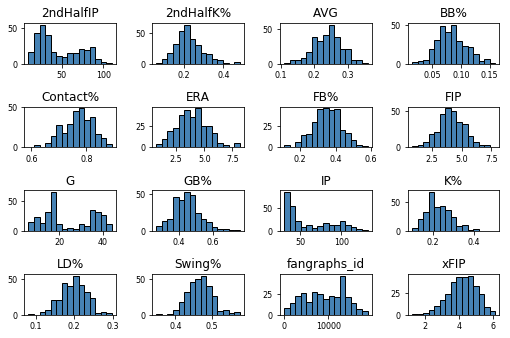

In [6]:
plt.clf
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
plt.show()

<h3> Checking the columns </h3>

In [7]:
data.columns

Index(['Name', 'Team', 'fangraphs_id', 'G', 'IP', 'ERA', 'FIP', 'xFIP', 'AVG',
       'K%', 'BB%', 'Swing%', 'Contact%', 'GB%', 'LD%', 'FB%', '2ndHalfK%',
       '2ndHalfIP'],
      dtype='object')

<h3> We do not have any missing values </h3>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 18 columns):
Name            296 non-null object
Team            296 non-null object
fangraphs_id    296 non-null int64
G               296 non-null int64
IP              296 non-null float64
ERA             296 non-null float64
FIP             296 non-null float64
xFIP            296 non-null float64
AVG             296 non-null float64
K%              296 non-null float64
BB%             296 non-null float64
Swing%          296 non-null float64
Contact%        296 non-null float64
GB%             296 non-null float64
LD%             296 non-null float64
FB%             296 non-null float64
2ndHalfK%       296 non-null float64
2ndHalfIP       296 non-null float64
dtypes: float64(14), int64(2), object(2)
memory usage: 41.7+ KB


<h3> Only name and team are strings, everything else is numeric which is good </h3>

In [9]:
data.dtypes

Name             object
Team             object
fangraphs_id      int64
G                 int64
IP              float64
ERA             float64
FIP             float64
xFIP            float64
AVG             float64
K%              float64
BB%             float64
Swing%          float64
Contact%        float64
GB%             float64
LD%             float64
FB%             float64
2ndHalfK%       float64
2ndHalfIP       float64
dtype: object

<h3> Dropping last column (2ndHalf_IP) as it should not be used any further

In [10]:
data.drop(data.columns[[17]], axis=1, inplace=True)

In [11]:
data.shape

(296, 17)

In [12]:
data.columns

Index(['Name', 'Team', 'fangraphs_id', 'G', 'IP', 'ERA', 'FIP', 'xFIP', 'AVG',
       'K%', 'BB%', 'Swing%', 'Contact%', 'GB%', 'LD%', 'FB%', '2ndHalfK%'],
      dtype='object')

<h3> Dropping Name column and Fan Graph ID column as they have almost 100% variance and are unique for each row </h3>

In [13]:
data_numeric = data.iloc[:,1:17]
data_numeric.drop(data_numeric.columns[[1]], axis=1, inplace=True)

In [14]:
data_numeric.columns

Index(['Team', 'G', 'IP', 'ERA', 'FIP', 'xFIP', 'AVG', 'K%', 'BB%', 'Swing%',
       'Contact%', 'GB%', 'LD%', 'FB%', '2ndHalfK%'],
      dtype='object')

<h3> Studying the correlation matrix </h3>

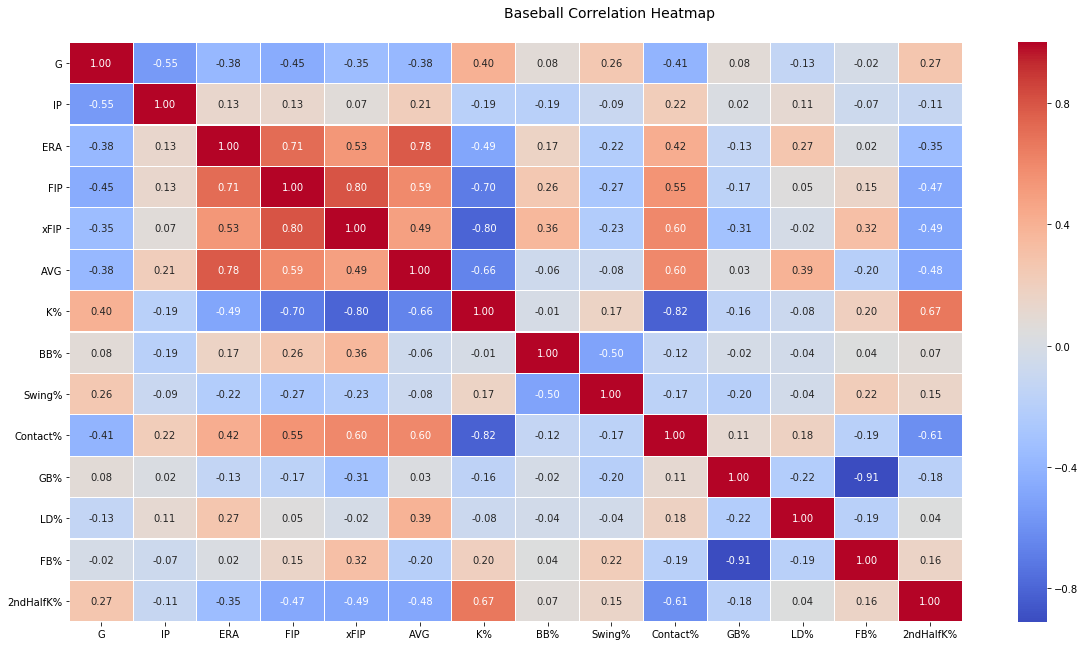

In [15]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data_numeric.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Baseball Correlation Heatmap', fontsize=14)
plt.show()

** 1. FIP and xFIP have a very strong correlation 80% ** <br>
** 2. Earned Run Average has a strong 78% correlation with Batting Average **  <br>
** 3. Fielding independent pitching has a strong correlation with Batting Average**  <br>
** 4. Contact% has an 80% negative correlation with first half strikeout %, as more the player contacts the ball, the less he strikes out** <br>
** 5. First half strikeout % is also correlated with 2nd half strikeout % by 66%** <br>
** 6. The more the player strikes out, it is tougher to manintain a higher batting average hence they are negatively correlated by 66%** <br>
** 7. BB% and swing% have a negative 50% correlation as the power hitters tend to swing and miss often resulting in more walks** <br>

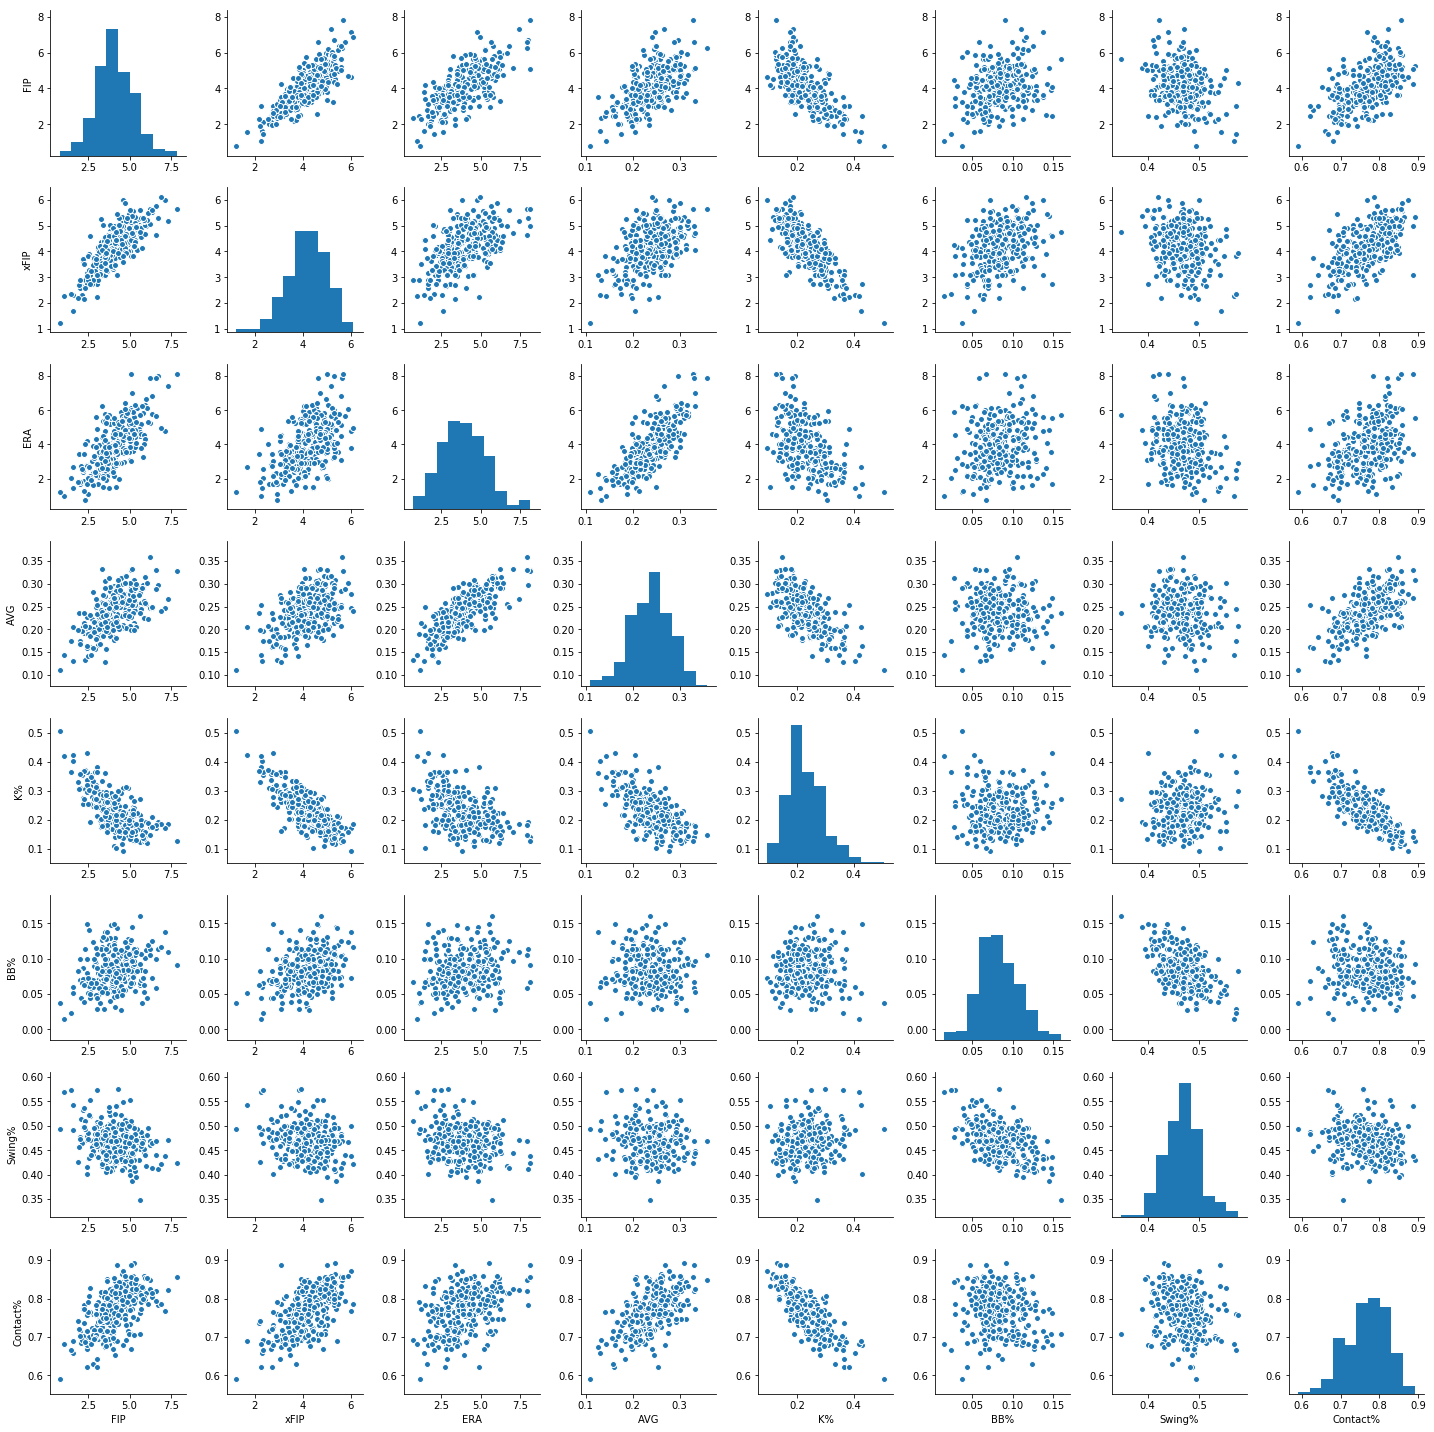

In [16]:
sns.pairplot(data_numeric[['FIP', 'xFIP', 'ERA', 'AVG', 'K%', 'BB%', 'Swing%', 'Contact%']])
plt.show()

In [17]:
def check_boxplot(col1, col2 , d):
    plt.figure(figsize=(12,10))
    sns.boxplot(x= col1, y= col2, data=d)
    plt.show()

<h3> Exploring games played per team </h3>
** Players from Blue Jays, Marlins and Cubs have played the most number of games in the first half **

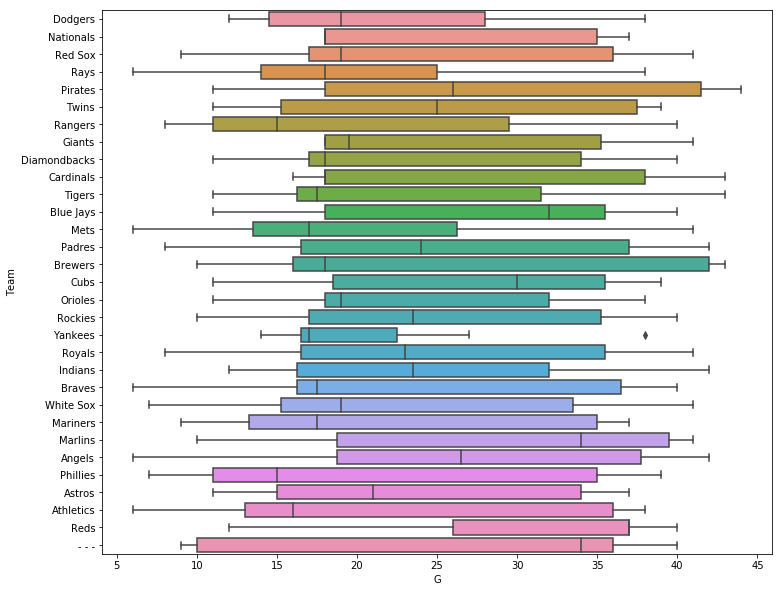

In [18]:
check_boxplot("G", "Team", data)

<h3> Exploring players innings pitched in first half played per team </h3>
** Nationals, giants and cardinals have the highest IP **

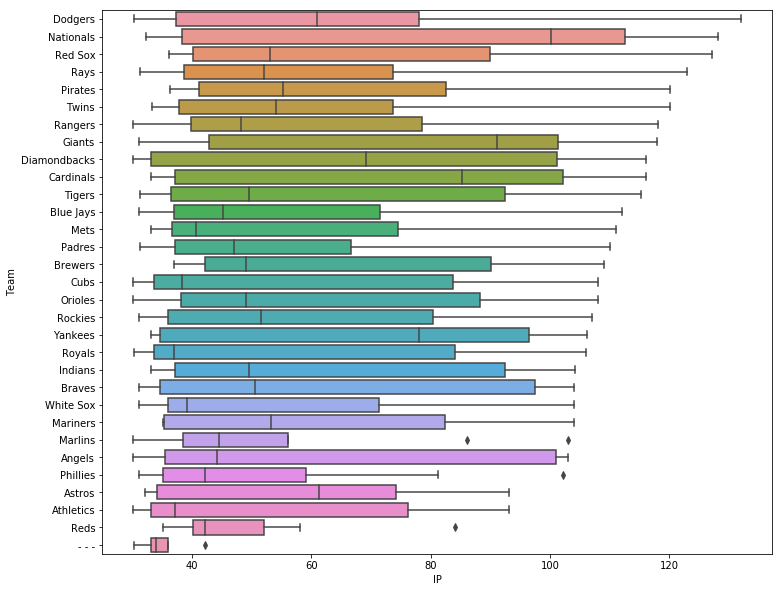

In [19]:
check_boxplot("IP", "Team", data)

<h3> Exploring earned run average played per team </h3>
**Mets, Padres and Royals take the lead **

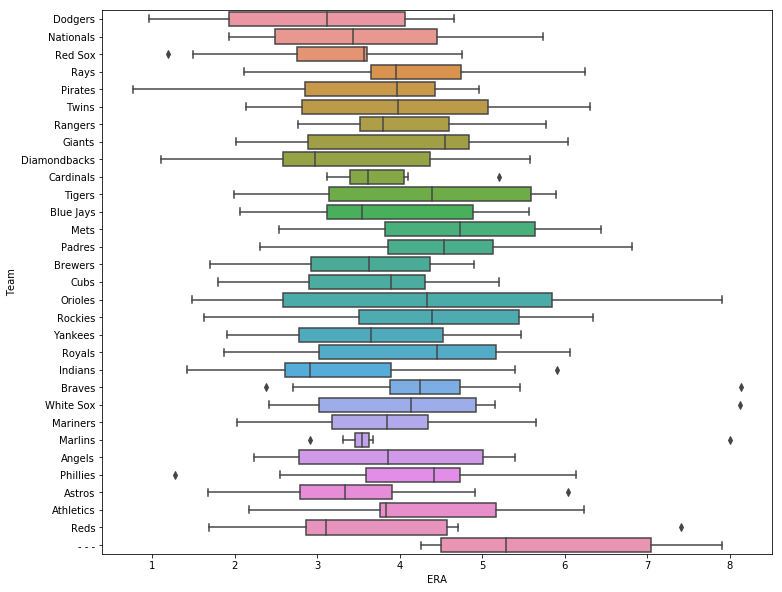

In [20]:
check_boxplot("ERA", "Team", data)

<h3> Which teams have players with excellent and worst first half strike out and BB% </h3>

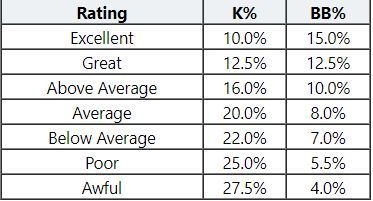

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("Capture.png")

<h3> Astros, Dodgers have most players with below average and worse combination of K% and BB%</h3>

In [22]:
data.loc[(data['K%'] > 0.22) & (data['BB%'] < 0.07)].groupby(['Team']).count().Name.sort_values(ascending = False).head(3)

Team
Astros     4
Dodgers    4
Yankees    3
Name: Name, dtype: int64

<h3> Rangers, White Sox have maximum players with above average and best combination of K% and BB% </h3>

In [23]:
data.loc[(data['K%'] < .16) & (data['BB%'] > 0.1)].groupby(['Team']).count().Name.sort_values(ascending = False).head(3)

Team
White Sox    2
Rangers      2
Twins        1
Name: Name, dtype: int64

<h2> Predictive Analytics </h2>

In [24]:
data_numeric.columns

Index(['Team', 'G', 'IP', 'ERA', 'FIP', 'xFIP', 'AVG', 'K%', 'BB%', 'Swing%',
       'Contact%', 'GB%', 'LD%', 'FB%', '2ndHalfK%'],
      dtype='object')

<h3>Preparing X as numpy array of features and y as numpy array of the target </h3>

In [25]:
X = data_numeric.iloc[:, :-1].values
y = data_numeric.iloc[:, 14].values

<h3> Creating dummy variables for teams </h3> 

In [26]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

<h3> Avoiding the dummy variable trap </h3>
** It means that we drop one dummy variable from all the dummy variables for a column becasue if all are 0 the column gets no value, which is not possible. Hence we remove one column which means that if all are 0, the one which we removed assumes the value 1. **

In [27]:
X = X[:, 1:]

<h3> Adding a column which takes a contant value of 1, which serves as the coefficient of the intercept - this is a requirement of the statsmodel modeule which runs OLS regression </h3>

In [28]:
X = np.append(arr= np.ones((296,1)).astype(int), values = X, axis = 1)

<h3> Splitting into train and test </h3>

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
X_train.shape

(207, 44)

<h3> Before we get into modeling, here is what we would use to measure our models: </h3>
* **MAE - Mean Absolute Error - It is the mean of the absolute differences between predicted and actual values** <br>
* **MSE - Mean Squared Error - It is the mean of the squared differences between predicted and actual values** <br>
* **R Squared - It is the percentage of variance that is explained by the dependent variables in the independent variables** <br>

**NOTE - But we would not use R Squared, why?
R Squared is a weak measure as it does not take into account the degrees of freedom and increases each time a new variable is added irrespective of the fact whether the newly added variable is improving the model or not.
Therefore, we use Adj R Squared which includes degrees of freedom.**

<h3> MODEL 1 - Running OLS regression </h3>

In [31]:
regressor_OLS = sm.OLS(endog=y_train, exog=X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     6.158
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           7.35e-18
Time:                        18:53:48   Log-Likelihood:                 362.39
No. Observations:                 207   AIC:                            -636.8
Df Residuals:                     163   BIC:                            -490.1
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2944      7.133      1.163      0.247      -5.791      22.380
x1             0.0223      0.040      0.550      0.583      -0.058       0.102
x2             0.0088      0.041      0.215      0.830      -0.072       0.089
x3            -0.0161      0.043     -0.370      0.712      -0.102       0.070
x4             0.0288      0.039      0.740      0.461      -0.048       0.106
x5             0.0234      0.039      0.602      0.548      -0.053       0.100
x6             0.0395      0.039      1.002      0.318      -0.038       0.117
x7             0.0189      0.041      0.464      0.643      -0.062       0.100
x8             0.0290      0.039      0.752      0.453      -0.047       0.105
x9             0.0341      0.040      0.847      0.398      -0.045       0.114
x10            0.0306      0.039      0.775      0.440      -0.047       0.108
x11            0.0277      0.042      0.664      0.508      -0.055       0.110
x12            0.0684      0.038      1.817      0.071      -0.006       0.143
x13            0.0502      0.043      1.177      0.241      -0.034       0.134
x14            0.0124      0.041      0.307      0.759      -0.068       0.092
x15            0.0429      0.042      1.032      0.304      -0.039       0.125
x16            0.0688      0.042      1.637      0.104      -0.014       0.152
x17            0.0472      0.041      1.145      0.254      -0.034       0.129
x18            0.0242      0.039      0.618      0.537      -0.053       0.102
x19            0.0565      0.040      1.403      0.162      -0.023       0.136
x20            0.0623      0.039      1.600      0.112      -0.015       0.139
x21            0.0308      0.039      0.790      0.431      -0.046       0.108
x22            0.0319      0.039      0.815      0.416      -0.045       0.109
x23            0.0597      0.040      1.493      0.137      -0.019       0.139
x24            0.0176      0.041      0.425      0.672      -0.064       0.099
x25            0.0262      0.038      0.687      0.493      -0.049       0.102
x26            0.0119      0.039      0.306      0.760      -0.065       0.089
x27            0.0337      0.039      0.870      0.386      -0.043       0.110
x28            0.0677      0.041      1.655      0.100      -0.013       0.148
x29            0.0203      0.040      0.503      0.615      -0.059       0.100
x30            0.1027      0.044      2.335      0.021       0.016       0.189
x31           -0.0003      0.000     -0.596      0.552      -0.001       0.001
x32         7.585e-05      0.000      0.475      0.635      -0.000       0.000
x33            0.0009      0.006      0.157      0.875      -0.010       0.012
x34           -0.0006      0.007     -0.083      0.934      -0.015       0.013
x35            0.0791      0.035      2.289      0.023       0.011       0.147
x3

In [32]:
y_pred = regressor_OLS.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('MAE is ', mean_absolute_error(y_test, y_pred))
print('MSE is ', mean_squared_error(y_test, y_pred))

MAE is  0.0437931733838
MSE is  0.00308452659873


In [34]:
regressor_OLS.rsquared_adj

0.51847046225776983

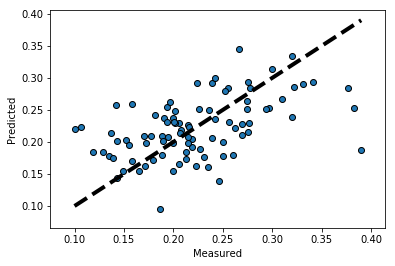

In [35]:
plt.clf
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> Summary of Model 1:</h3>

** MAE is  0.0437931733838 <br>
   MSE is  0.00308452659873**<br>
**Adj R Squared is low 0.51847046225776983**

<h3>MODEL 2 - Removing teams - As they had high p values</h3>

In [36]:
#removing teams
data_numeric.drop(data_numeric.columns[[0]], axis=1, inplace=True)

In [37]:
data_numeric.columns

Index(['G', 'IP', 'ERA', 'FIP', 'xFIP', 'AVG', 'K%', 'BB%', 'Swing%',
       'Contact%', 'GB%', 'LD%', 'FB%', '2ndHalfK%'],
      dtype='object')

In [38]:
X = data_numeric.iloc[:, :-1].values
y = data_numeric.iloc[:, 13].values

In [39]:
X = np.append(arr= np.ones((296,1)).astype(int), values = X, axis = 1)

In [40]:
X.shape

(296, 14)

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
regressor_OLS = sm.OLS(endog=y_train, exog=X_train).fit()
regressor_OLS.summary(xname=['G', 'IP', 'ERA', 'FIP', 'xFIP', 'AVG', 'K%', 'BB%', 'Swing%',
       'Contact%', 'GB%', 'LD%', 'FB%', '2ndHalfK%'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     16.76
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           2.35e-25
Time:                        18:53:49   Log-Likelihood:                 340.73
No. Observations:                 207   AIC:                            -653.5
Df Residuals:                     193   BIC:                            -606.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G              6.6556      6.761      0.984      0.326      -6.679      19.990
IP            -0.0004      0.000     -0.941      0.348      -0.001       0.000
ERA            0.0001      0.000      0.963      0.337      -0.000       0.000
FIP           -0.0018      0.005     -0.344      0.731      -0.012       0.009
xFIP           0.0003      0.006      0.041      0.967      -0.012       0.013
AVG            0.0704      0.033      2.167      0.031       0.006       0.135
K%            -0.1353      0.181     -0.746      0.457      -0.493       0.222
BB%            1.2953      0.367      3.525      0.001       0.571       2.020
Swing%        -0.3528      0.382     -0.923      0.357      -1.106       0.401
Contact%       0.2422      0.133      1.815      0.071      -0.021       0.505
GB%           -0.1984      0.114     -1.736      0.084      -0.424       0.027
LD%           -6.8586      6.751     -1.016      0.311     -20.174       6.456
FB%           -6.5735      6.751     -0.974      0.331     -19.889       6.742
2ndHalfK%     -7.1707      6.746     -1.063      0.289     -20.476       6.135
==============================================================================
Omnibus:                        1.610   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.274
Skew:                          -0.099   Prob(JB):                        0.529
Kurtosis:                       3.330   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
y_pred = regressor_OLS.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('MAE is ', mean_absolute_error(y_test, y_pred))
print('MSE is ', mean_squared_error(y_test, y_pred))

MAE is  0.0374082784359
MSE is  0.00233597507547


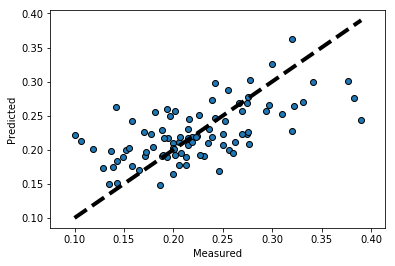

In [45]:
plt.clf
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3>Summary of Model 2:</h3> 

**MAE came down from  0.0437931733838 to 0.0374082784359<br>
MSE came down from  0.00308452659873 to 0.00233597507547<br>
Adj R Squared dropped by 1% and is 0.499 **

<h3> MODEL 3 - Lets try another approach using beckward elimination</h3>

**Write a function that runs regression with all variables and keeps on removing the ones with high pvalue, this process is called backword elimination**

In [46]:
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((207,14)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y_train, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y_train, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary(xname = ['G', 'IP', 'ERA', 'FIP', 'xFIP', 'AVG', 'K%', 'BB%', 'Swing%',
       'Contact%', 'GB%', 'LD%', 'FB%', '2ndHalfK%'])
    return x

In [47]:
SL = 0.05
X_Modeled = backwardElimination(X_train, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     604.9
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          3.55e-135
Time:                        18:53:50   Log-Likelihood:                 338.93
No. Observations:                 207   AIC:                            -661.9
Df Residuals:                     199   BIC:                            -635.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0008      0.000     -2.155      0.0

In [48]:
y_pred = regressor_OLS.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('MAE is ', mean_absolute_error(y_test, y_pred))
print('MSE is ', mean_squared_error(y_test, y_pred))

MAE is  0.0374082784359
MSE is  0.00233597507547


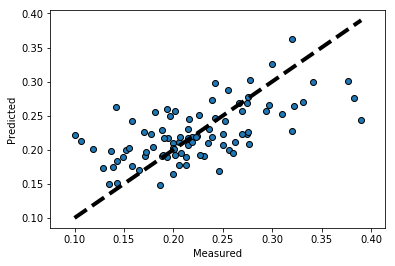

In [50]:
plt.clf
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3>Summary of Model 3:</h3> 

**MAE and MSE remain almost the same<br>
BUT Adj R Squared is now 96% **

<h1> MODEL 4 -  XGBoost </h1>

<h3>What is XGBOOST?</h3><br>
* **XGBoost is short for “Extreme Gradient Boosting”, where the term “Gradient Boosting”. XGBoost is used for supervised learning problems, where we use the training data to predict a target variable**
* **It is the most powerful implementation of gradient boost and one of the most popular and powerful algorithm**
* **Boosting is not a ML algo by itself rather it is a concept that can be applied to a set of ML algorithms**
* **Boosting converts multiple weak learners into a strong learner (An algo that can be tuned to achieve good performance). A weak leaner is an ML algorithm that is slightly better than chance**<br>
<h3>What are its advantages?</h3><br>
* **XGboost is popular because of its speed and performance, core algorithm is parallelizable**<br>
<h3>How is boosting accomplished</h3><br>
* ** Boosting converts multiple weak learners into a strong learner (An algo that can be tuned to achieve good performance). A weak leaner is an ML algorithm that is slightly better than chance.** <br>
* **Iteratively learning a set of weak models on subsets of data**
* **Weighting each weak prediction according to each weak learner’s performance**
* **Combine the weighted predictions to obtain a single weighted prediction**

**NOTE - XGBoost converts the data into a dmatrix (its own optimized data structure) datatype for better performance, this is done on the fly, however, if we do cross validation we need to explicitly convert the data into d matrix**

In [51]:
data_numeric.shape

(296, 14)

In [52]:
X = data_numeric.iloc[:, :-1].values
y = data_numeric.iloc[:, 13].values

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<h3>Parameters used: </h3>
**1. N_estimators: Number of trees used in the gradient boost**<br>
**2. max_depth: The maximum depth of a tree**<br>
**3. min_samples_split: The minimum number of samples required to split an internal node**<br>
**4. learning_rate: The value by which the gradient descends to find the global minima in the cost function**

In [54]:
from sklearn import ensemble
params = {'n_estimators':[20, 50, 100, 200, 500], 'max_depth': [4, 6, 8, 10, 12], 'min_samples_split': [4,6, 8, 10],
          'learning_rate': [0.01, 0.02, 0.03, 0.04]}

<h3> Instantiating the regressor </h3>

In [55]:
regressor = ensemble.GradientBoostingRegressor()

<h3> What is Grid Search? </h3>

** Grid search is a very powerful library that allows you to define a dictionary of parameters upfront, the module runs a model for each permutation of parameters and spits out the one with the best scoring method specified in the algorithm **

In [ ]:
gs = GridSearchCV(regressor, param_grid=params, scoring='neg_mean_absolute_error', cv=5)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_

In [ ]:
y_pred = gs.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('MAE is ', mean_absolute_error(y_test, y_pred))
print('MSE is ', mean_squared_error(y_test, y_pred))

In [ ]:
plt.clf
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
gs.best_estimator_.feature_importances_

In [ ]:
a = gs.best_estimator_.feature_importances_
feature_labels = data_numeric.columns.tolist()
importance = gs.best_estimator_.feature_importances_
importance_sorted = importance.argsort()
for i in importance_sorted:
    print(f"Feature label {feature_labels[i]} has {importance[i]*100:.2} % importance")

In [ ]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

c = np.array(data_numeric.columns.tolist())
# Plot feature importance
feature_importance = gs.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, c[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<h3> Summary of model 4: </h3>

** The MSE and MAE have increased by a small margin so Model 3 still has the best results **<br>
** But XGboost is a powerful algorithm and helps us understand what are the most important features by aplot that can be viewed above**<br>
**K %, Contact %, Batting Average and FIP athe top features that help in predicting the 2nd half strike out percentage**

<h2> Conclusion </h2>

**The best model is model 3 but we can use model 4 to understand what variables are important**

<h2> Challenges </h2>

* ** The Dataset is too small to make any drastic improvements in any algorithm and can lead to overfitting by just a small change **<br>
* ** More coputing power would have allowed me to use techniques like cross validation and grid search with more parameters**<br>
* ** Due to my limited knowledge in baseball, a lot of factors could not be considered but in my researcg I did find many other attributes but was not sure which ones to include with time being a constraint. For instance, I tried using velocity but I was not sure which velocity to use as there were 4 measures of velocity on the website mentioned**